In [57]:
import os
os.chdir(os.getcwd())
os.getcwd()

'/Users/pantchanit/Documents/Pant_Stat_Asign1'

In [58]:
import pandas as pd
import numpy as np
import matplotlib as mpe
import seaborn as sns
%matplotlib inline

In [59]:
country = pd.read_excel('countries_regions.xlsx')
country.head()

,Country Name,Region,ThirdWorld
0,Afghanistan,South Asia,1
1,Albania,Eastern Europe,0
2,Algeria,Africa,0
3,American Samoa,Australia and Oceanea,0
4,Andorra,Western Europe,0


In [60]:
# Removing the outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

# GET DATA Broadband

In [61]:
broadband1 = pd.read_excel('infrastructure/broadband.xlsx')
broadband1.replace({'..':np.nan},inplace=True)
broadband1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
broadband1 = country.join(broadband1[['Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']])
broadband1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,Eastern Europe,0,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,Africa,0,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,Australia and Oceanea,0,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,VIR,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,8.641729,8.657267,8.574859,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,Middle East,0,PSE,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,3.758487,4.394125,4.916669,5.309577,6.060718,6.917773,7.580678,7.486892,7.324839,7.312678
214,"Yemen, Rep.",Middle East,1,YEM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,0.457837,0.683606,1.021191,1.316631,1.490685,1.016699,1.325692,1.355607,NaN,NaN
215,Zambia,Africa,1,ZMB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,0.117056,0.103691,0.090088,0.133255,0.147298,0.194238,0.213082,0.416259,0.497681,0.447765


<AxesSubplot:>

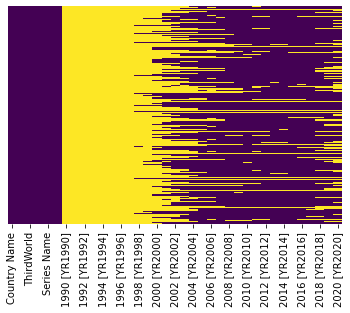

In [63]:
sns.heatmap(broadband1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [64]:
broadband1.drop(['1990 [YR1990]','1991 [YR1991]','1992 [YR1992]','1993 [YR1993]','1994 [YR1994]','1995 [YR1995]','1996 [YR1996]','1997 [YR1997]'],axis=1, inplace=True)
broadband1.head()

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,Eastern Europe,0,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,Africa,0,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,Australia and Oceanea,0,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN


In [65]:
broadbandRe1 = broadband1[(broadband1["Region"] == "Thailand") |(broadband1["Region"] == "North America") | (broadband1["Region"] == "South America") | (broadband1["Region"] == "Western Asia")]
broadbandRe1 = broadbandRe1.dropna()
broadbandRe1.head()


,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
26,Brazil,South America,0,BRA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.000589,0.004062,0.057211,0.186799,...,9.028728,9.594011,10.625283,11.820828,12.462590,13.028900,13.909125,14.910538,15.592074,17.098593
35,Canada,North America,0,CAN,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.466324,1.920633,4.612640,9.183916,...,32.666050,33.474326,34.265299,35.239685,36.404624,36.793328,37.906373,38.963659,40.826166,41.801011
206,United States,North America,0,USA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.256527,0.988801,2.509620,4.494889,...,28.344519,29.458940,30.351402,30.692865,31.853820,32.727172,33.283628,33.860368,34.725367,36.413908


<AxesSubplot:>

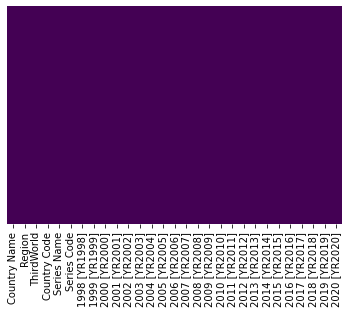

In [66]:
broadband1 = broadband1.dropna()
sns.heatmap(broadband1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
#2005 with outliers

In [68]:
broadbandRe1.groupby("Region")['2010 [YR2010]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,2.0,29.514953,3.058337,27.352382,28.433668,29.514953,30.596239,31.677525
South America,1.0,7.204858,NaN,7.204858,7.204858,7.204858,7.204858,7.204858


In [69]:
#2005 without outliers

In [70]:
broadbandRe1_without_2010 = broadbandRe1[["Country Name","Region","2010 [YR2010]"]]
broadbandRe1_without_2010

,Country Name,Region,2010 [YR2010]
26,Brazil,South America,7.204858
35,Canada,North America,31.677525
206,United States,North America,27.352382


In [71]:
upper, lower = outliers(broadbandRe1_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
broadbandRe1_without_2010 = broadbandRe1_without_2010[(broadbandRe1_without_2010["2010 [YR2010]"] > lower) & (broadbandRe1_without_2010["2010 [YR2010]"] < upper)]
broadbandRe1_without_2010

Upper whisker:  47.869453254250004
Lower Whisker:  -1.0758795037500022


,Country Name,Region,2010 [YR2010]
26,Brazil,South America,7.204858
35,Canada,North America,31.677525
206,United States,North America,27.352382


In [72]:
broadbandRe1_without_2010.groupby("Region")['2010 [YR2010]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,2.0,29.514953,3.058337,27.352382,28.433668,29.514953,30.596239,31.677525
South America,1.0,7.204858,NaN,7.204858,7.204858,7.204858,7.204858,7.204858


In [73]:
#2015 with outliers

In [74]:
broadbandRe1.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,2.0,32.966275,3.215087,30.692865,31.829570,32.966275,34.102980,35.239685
South America,1.0,11.820828,NaN,11.820828,11.820828,11.820828,11.820828,11.820828


In [75]:
#2015 without outliers

In [76]:
broadbandRe1_without_2014 = broadbandRe1[["Country Name","Region","2014 [YR2014]"]]
broadbandRe1_without_2014

,Country Name,Region,2014 [YR2014]
26,Brazil,South America,11.820828
35,Canada,North America,35.239685
206,United States,North America,30.692865


In [77]:
upper, lower = outliers(broadbandRe1_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
broadbandRe1_without_2014 = broadbandRe1_without_2014[(broadbandRe1_without_2014["2014 [YR2014]"] > lower) & (broadbandRe1_without_2014["2014 [YR2014]"] < upper)]
broadbandRe1_without_2014

Upper whisker:  50.530418019999985
Lower Whisker:  3.6927033000000087


,Country Name,Region,2014 [YR2014]
26,Brazil,South America,11.820828
35,Canada,North America,35.239685
206,United States,North America,30.692865


In [78]:
broadbandRe1_without_2014.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,2.0,32.966275,3.215087,30.692865,31.829570,32.966275,34.102980,35.239685
South America,1.0,11.820828,NaN,11.820828,11.820828,11.820828,11.820828,11.820828


# GET DATA Electricity

In [79]:
electricity1 = pd.read_excel('infrastructure/electricity.xlsx')
electricity1.replace({'..':np.nan},inplace=True)
electricity1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,596.407959,663.783995,...,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,550.971960,559.917891,...,1123.332915,1237.966109,1278.915242,1362.871884,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
electricity1 = country.join(electricity1[['Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']])
electricity1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Eastern Europe,0,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,...,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,0,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,...,1123.332915,1237.966109,1278.915242,1362.871884,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,Australia and Oceanea,0,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,VIR,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,Middle East,0,PSE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,"Yemen, Rep.",Middle East,1,YEM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,125.619268,133.310280,134.242622,136.569517,...,193.803773,193.804024,250.963212,219.799897,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,Africa,1,ZMB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,761.865751,736.782955,735.740792,740.600918,...,631.738878,733.210611,747.058044,717.347305,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

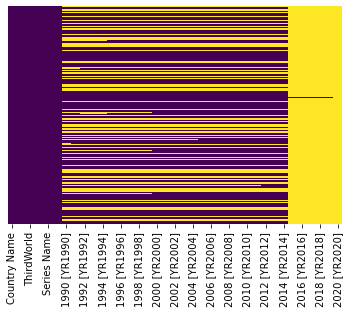

In [81]:
sns.heatmap(electricity1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [82]:
electricity1.drop(['2015 [YR2015]','2016 [YR2016]','2017 [YR2017]','2018 [YR2018]','2019 [YR2019]','2020 [YR2020]'],axis=1, inplace=True)
electricity1.head()

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
0,Afghanistan,South Asia,1,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Eastern Europe,0,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,...,1722.072850,1218.360146,1213.124369,1617.744156,1835.684072,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503
2,Algeria,Africa,0,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,...,890.625924,862.429594,894.284586,947.291328,866.307302,1016.636782,1123.332915,1237.966109,1278.915242,1362.871884
3,American Samoa,Australia and Oceanea,0,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
electricityRe1 = electricity1[(electricity1["Region"] == "Thailand") |(electricity1["Region"] == "North America") | (electricity1["Region"] == "South America") | (electricity1["Region"] == "Western Asia")]
electricityRe1 = electricityRe1.dropna()
electricityRe1


,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
7,Argentina,South America,0,ARG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1303.978019,1347.592046,1410.377544,1496.904499,...,2408.432958,2374.097592,2455.656081,2772.843291,2730.123367,2877.652653,2929.075029,3000.603523,2967.376558,3074.702071
8,Armenia,Western Asia,0,ARM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2722.598500,2689.680533,1962.635282,1195.024488,...,1521.503310,1639.792570,1773.161496,1669.409464,1661.303268,1726.262758,1807.034572,1892.006869,1931.258117,1961.610395
12,Azerbaijan,Western Asia,0,AZE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2575.639056,2631.137395,2276.076944,2119.679787,...,2388.388734,2552.286214,2118.210528,2040.760435,1620.387420,1603.431374,1705.424633,2052.650965,2092.536521,2202.393918
23,Bolivia,South America,0,BOL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,266.138798,280.540875,290.046652,312.600123,...,476.587581,506.947566,538.686342,527.801543,546.597348,596.501183,629.005270,654.481730,695.953236,742.538400
26,Brazil,South America,0,BRA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1460.760329,1486.224610,1494.061476,1537.592639,...,2015.799869,2072.362680,2167.606561,2229.845299,2197.125581,2374.116628,2430.803310,2501.474103,2568.829695,2619.960499
35,Canada,North America,0,CAN,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,16167.374559,16181.588748,16164.419040,16320.127298,...,16948.275221,16508.339552,16683.133659,16377.479696,15450.730689,15269.745477,15644.540278,15336.624857,15750.811633,15588.487146
40,Chile,South America,0,CHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1237.625161,1313.943308,1457.089300,1514.743634,...,3095.649042,3222.414470,3339.463325,3338.289965,3296.541125,3306.953699,3583.584239,3807.507650,3879.859848,3879.673420
42,Colombia,South America,0,COL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,871.593984,871.192436,778.704250,872.809626,...,909.216014,961.044771,988.579323,988.453908,1065.607653,1094.560942,1139.659863,1170.073931,1310.664698,1312.199493
46,Costa Rica,North America,0,CRI,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1071.988654,1121.769798,1405.435833,1332.918977,...,1721.151118,1822.838339,1885.517635,1889.035996,1845.052324,1887.983299,1885.352441,1942.831521,1939.853369,1942.490600
49,Cuba,North America,0,CUB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1212.325844,1048.855983,904.494306,840.183322,...,1155.077091,1227.218208,1302.448459,1323.398868,1334.763138,1303.154964,1332.512094,1379.216979,1435.557838,1450.882819


In [84]:
#2005 with outliers

In [85]:
electricityRe1.groupby("Region")['2010 [YR2010]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,15.0,3630.207638,4829.435226,24.524294,737.461937,1394.825870,4103.957683,15269.745477
South America,10.0,1967.797990,1039.191869,596.501183,1115.006843,1772.764147,2862.186445,3306.953699
Thailand,1.0,2307.804541,NaN,2307.804541,2307.804541,2307.804541,2307.804541,2307.804541
Western Asia,8.0,2175.963533,1075.784126,1371.721214,1640.958465,1809.740147,2132.671337,4728.011591


In [86]:
#2005 without outliers

In [87]:
electricityRe1_without_2010 = electricityRe1[["Country Name","Region","2010 [YR2010]"]]
electricityRe1_without_2010

,Country Name,Region,2010 [YR2010]
7,Argentina,South America,2877.652653
8,Armenia,Western Asia,1726.262758
12,Azerbaijan,Western Asia,1603.431374
23,Bolivia,South America,596.501183
26,Brazil,South America,2374.116628
35,Canada,North America,15269.745477
40,Chile,South America,3306.953699
42,Colombia,South America,1094.560942
46,Costa Rica,North America,1887.983299
49,Cuba,North America,1303.154964


In [88]:
upper, lower = outliers(electricityRe1_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
electricityRe1_without_2010 = electricityRe1_without_2010[(electricityRe1_without_2010["2010 [YR2010]"] > lower) & (electricityRe1_without_2010["2010 [YR2010]"] < upper)]
electricityRe1_without_2010

Upper whisker:  5048.903693607724
Lower Whisker:  -1195.229330161671


,Country Name,Region,2010 [YR2010]
7,Argentina,South America,2877.652653
8,Armenia,Western Asia,1726.262758
12,Azerbaijan,Western Asia,1603.431374
23,Bolivia,South America,596.501183
26,Brazil,South America,2374.116628
40,Chile,South America,3306.953699
42,Colombia,South America,1094.560942
46,Costa Rica,North America,1887.983299
49,Cuba,North America,1303.154964
56,Dominican Republic,North America,1394.825870


In [89]:
electricityRe1_without_2010.groupby("Region")['2010 [YR2010]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,11.0,1102.555471,641.811306,24.524294,586.949717,1216.169287,1569.982143,2018.827437
South America,10.0,1967.797990,1039.191869,596.501183,1115.006843,1772.764147,2862.186445,3306.953699
Thailand,1.0,2307.804541,NaN,2307.804541,2307.804541,2307.804541,2307.804541,2307.804541
Western Asia,8.0,2175.963533,1075.784126,1371.721214,1640.958465,1809.740147,2132.671337,4728.011591


In [90]:
#2014 with outliers

In [91]:
electricityRe1.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,15.0,3567.978326,4740.932035,39.055809,778.455780,1615.514607,3477.497112,15588.487146
South America,10.0,2170.805944,1029.938290,742.538400,1353.507664,2086.172593,2985.811140,3879.673420
Thailand,1.0,2538.795713,NaN,2538.795713,2538.795713,2538.795713,2538.795713,2538.795713
Western Asia,8.0,2527.887558,1314.567685,1499.485994,1867.276781,2082.002157,2682.567295,5600.208465


In [92]:
#2014 without outliers

In [93]:
electricityRe1_without_2014 = electricityRe1[["Country Name","Region","2014 [YR2014]"]]
electricityRe1_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
35,Canada,North America,15588.487146
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
46,Costa Rica,North America,1942.490600
49,Cuba,North America,1450.882819


In [94]:
upper, lower = outliers(electricityRe1_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
electricityRe1_without_2014 = electricityRe1_without_2014[(electricityRe1_without_2014["2014 [YR2014]"] > lower) & (electricityRe1_without_2014["2014 [YR2014]"] < upper)]
electricityRe1_without_2014

Upper whisker:  4751.855883649014
Lower Whisker:  -685.501268082822


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
46,Costa Rica,North America,1942.490600
49,Cuba,North America,1450.882819
56,Dominican Republic,North America,1615.514607


In [95]:
electricityRe1_without_2014.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,11.0,1186.053917,705.791192,39.055809,610.513409,1050.732539,1779.002603,2157.323788
South America,10.0,2170.805944,1029.938290,742.538400,1353.507664,2086.172593,2985.811140,3879.673420
Thailand,1.0,2538.795713,NaN,2538.795713,2538.795713,2538.795713,2538.795713,2538.795713
Western Asia,7.0,2088.984572,467.085078,1499.485994,1793.331731,1961.610395,2440.579696,2693.972760


# GET DATA Mobile

In [96]:
mobile1 = pd.read_excel('infrastructure/mobile.xlsx')
mobile1.replace({'..':np.nan},inplace=True)
mobile1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,45.813626,49.227977,52.083576,55.159515,57.271068,61.054638,65.929134,59.120848,59.356020,58.255812
1,Albania,ALB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,105.852915,120.105858,126.936969,115.997935,117.659218,116.744444,125.710352,94.176998,91.293015,91.002944
2,Algeria,DZA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.001825,0.01811,0.017689,0.017300,0.004778,0.016312,...,97.148178,100.384679,103.610140,111.238610,108.808940,116.004208,110.767246,111.664792,105.510594,103.887317
3,American Samoa,ASM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.402918,1.764014,2.303484,2.351348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.307567,1.279297,1.250858,4.424432,...,77.667260,77.480680,79.147993,83.623900,91.443514,98.492826,104.332411,107.282549,113.957377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
mobile1 = country.join(mobile1[['Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']])
mobile1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,...,45.813626,49.227977,52.083576,55.159515,57.271068,61.054638,65.929134,59.120848,59.356020,58.255812
1,Albania,Eastern Europe,0,ALB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,...,105.852915,120.105858,126.936969,115.997935,117.659218,116.744444,125.710352,94.176998,91.293015,91.002944
2,Algeria,Africa,0,DZA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.001825,0.01811,0.017689,0.017300,...,97.148178,100.384679,103.610140,111.238610,108.808940,116.004208,110.767246,111.664792,105.510594,103.887317
3,American Samoa,Australia and Oceanea,0,ASM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.402918,1.764014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.307567,1.279297,...,77.667260,77.480680,79.147993,83.623900,91.443514,98.492826,104.332411,107.282549,113.957377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,VIR,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,Middle East,0,PSE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,NaN,0.000000,0.000000,...,69.523085,73.904186,73.617539,72.201640,77.961373,80.100672,84.179796,89.975754,86.325385,83.658511
214,"Yemen, Rep.",Middle East,1,YEM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.011965,0.037920,...,49.009585,56.796874,66.984638,66.218793,56.691131,60.486341,55.175024,53.678933,NaN,NaN
215,Zambia,Africa,1,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,...,58.221742,72.758845,69.646403,65.681859,72.784572,73.438230,79.736910,89.157044,96.414412,103.917835


<AxesSubplot:>

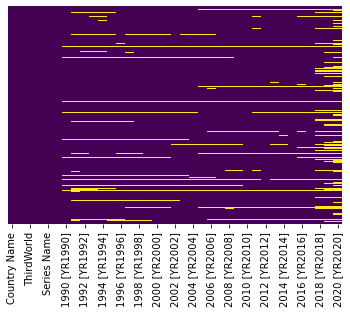

In [98]:
sns.heatmap(mobile1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [99]:
mobileRe1 = mobile1[(mobile1["Region"] == "Thailand") |(mobile1["Region"] == "North America") | (mobile1["Region"] == "South America") | (mobile1["Region"] == "Western Asia")]
mobileRe1 = mobileRe1.dropna()
mobileRe1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
7,Argentina,South America,0,ARG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.036789,0.075577,0.138953,0.329702,...,146.955455,154.059023,159.639461,143.615832,143.566834,146.453828,140.877124,132.093151,125.842106,121.170400
8,Armenia,Western Asia,0,ARM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.000000,0.000000,...,111.634715,115.206915,115.484845,118.772363,118.421714,116.975467,118.464231,121.259018,122.348753,117.735771
12,Azerbaijan,Western Asia,0,AZE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.000000,0.000000,...,110.647285,109.288037,107.933904,111.013461,111.165078,104.652373,102.861055,103.921419,106.992453,102.023073
23,Bolivia,South America,0,BOL,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.004207,0.021659,0.036361,...,81.790959,91.477196,98.893295,97.607289,93.496609,91.609739,97.948414,100.816408,101.526348,101.125004
26,Brazil,South America,0,BRA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000448,0.004418,0.020744,0.116035,...,118.653296,124.605885,134.851428,138.451183,126.087956,118.385594,106.464488,99.971702,95.716495,96.836350
35,Canada,North America,0,CAN,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,2.119601,2.781872,3.637316,4.669271,...,77.708898,79.376829,80.347846,80.722095,82.619335,84.523122,86.281493,89.578941,91.863107,95.630528
40,Chile,South America,0,CHL,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.104869,0.267768,0.469671,0.610874,...,129.487043,137.589055,134.657426,133.345192,129.144066,127.972519,124.594478,134.437321,132.184560,131.136145
42,Colombia,South America,0,COL,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.000000,0.000000,...,101.177487,106.490709,108.172020,117.804953,120.636922,121.816006,127.213696,129.908610,131.672444,132.996708
46,Costa Rica,North America,0,CRI,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.091525,0.134419,...,89.639325,114.720179,149.975127,146.399004,155.443557,170.036280,178.594427,169.930698,169.393555,147.471456
49,Cuba,North America,0,CUB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.002180,0.004634,...,11.704009,14.938522,17.688088,22.382360,29.451748,35.181856,40.688585,47.391537,53.316611,58.815122


In [100]:
#2005 with outliers

In [101]:
mobileRe1.groupby("Region")['2010 [YR2010]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,12.0,95.899408,43.740779,8.934883,73.807664,86.841462,116.582778,182.457290
South America,8.0,102.667651,19.286954,71.445775,98.272273,98.479963,104.553591,139.580018
Thailand,1.0,106.743463,NaN,106.743463,106.743463,106.743463,106.743463,106.743463
Western Asia,5.0,104.999598,23.144896,73.474775,97.051620,100.748987,119.383872,134.338737


In [102]:
#2005 without outliers

In [103]:
mobileRe1_without_2010 = mobileRe1[["Country Name","Region","2010 [YR2010]"]]
mobileRe1_without_2010

,Country Name,Region,2010 [YR2010]
7,Argentina,South America,139.580018
8,Armenia,Western Asia,134.338737
12,Azerbaijan,Western Asia,100.748987
23,Bolivia,South America,71.445775
26,Brazil,South America,100.621491
35,Canada,North America,75.628821
40,Chile,South America,116.349891
42,Colombia,South America,98.352493
46,Costa Rica,North America,68.344192
49,Cuba,North America,8.934883


In [104]:
upper, lower = outliers(mobileRe1_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
mobileRe1_without_2010 = mobileRe1_without_2010[(mobileRe1_without_2010["2010 [YR2010]"] > lower) & (mobileRe1_without_2010["2010 [YR2010]"] < upper)]
mobileRe1_without_2010

Upper whisker:  168.73796186124997
Lower Whisker:  27.655440031250016


,Country Name,Region,2010 [YR2010]
7,Argentina,South America,139.580018
8,Armenia,Western Asia,134.338737
12,Azerbaijan,Western Asia,100.748987
23,Bolivia,South America,71.445775
26,Brazil,South America,100.621491
35,Canada,North America,75.628821
40,Chile,South America,116.349891
42,Colombia,South America,98.352493
46,Costa Rica,North America,68.344192
56,Dominican Republic,North America,91.724312


In [105]:
mobileRe1_without_2010.groupby("Region")['2010 [YR2010]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,10.0,95.940072,25.799874,68.032328,76.745527,86.841462,114.013725,142.622767
South America,8.0,102.667651,19.286954,71.445775,98.272273,98.479963,104.553591,139.580018
Thailand,1.0,106.743463,NaN,106.743463,106.743463,106.743463,106.743463,106.743463
Western Asia,5.0,104.999598,23.144896,73.474775,97.051620,100.748987,119.383872,134.338737


In [106]:
#2014 with outliers

In [107]:
mobileRe1.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,12.0,103.813361,39.760677,22.382360,85.116519,98.722115,122.640207,177.019589
South America,8.0,125.528895,24.504903,97.607289,103.478030,125.575072,139.742345,167.692983
Thailand,1.0,141.872851,NaN,141.872851,141.872851,141.872851,141.872851,141.872851
Western Asia,5.0,120.002168,34.322596,71.119845,111.013461,118.772363,133.837665,165.267504


In [108]:
#2014 without outliers

In [109]:
mobileRe1_without_2014 = mobileRe1[["Country Name","Region","2014 [YR2014]"]]
mobileRe1_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,143.615832
8,Armenia,Western Asia,118.772363
12,Azerbaijan,Western Asia,111.013461
23,Bolivia,South America,97.607289
26,Brazil,South America,138.451183
35,Canada,North America,80.722095
40,Chile,South America,133.345192
42,Colombia,South America,117.804953
46,Costa Rica,North America,146.399004
49,Cuba,North America,22.382360


In [110]:
upper, lower = outliers(mobileRe1_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
mobileRe1_without_2014 = mobileRe1_without_2014[(mobileRe1_without_2014["2014 [YR2014]"] > lower) & (mobileRe1_without_2014["2014 [YR2014]"] < upper)]
mobileRe1_without_2014

Upper whisker:  211.41653641750003
Lower Whisker:  23.685596437499996


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,143.615832
8,Armenia,Western Asia,118.772363
12,Azerbaijan,Western Asia,111.013461
23,Bolivia,South America,97.607289
26,Brazil,South America,138.451183
35,Canada,North America,80.722095
40,Chile,South America,133.345192
42,Colombia,South America,117.804953
46,Costa Rica,North America,146.399004
56,Dominican Republic,North America,81.686045


In [111]:
mobileRe1_without_2014.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,11.0,111.216180,31.868792,80.722095,86.729452,104.533729,130.219865,177.019589
South America,8.0,125.528895,24.504903,97.607289,103.478030,125.575072,139.742345,167.692983
Thailand,1.0,141.872851,NaN,141.872851,141.872851,141.872851,141.872851,141.872851
Western Asia,5.0,120.002168,34.322596,71.119845,111.013461,118.772363,133.837665,165.267504
